In [1]:
import numpy as np
from pathlib import Path
from complexcgr import FCGR

In [2]:
import json
PATH_TRAIN="/data/bacteria/experiments/autoencoders/6mer/26122023-2"
KMER=6
with open(f"{PATH_TRAIN}/faiss-embeddings/query_embeddings.json") as fp:
    id_query = json.load(fp)
    id_query = {int(k): v for k,v in id_query.items()}


In [3]:
fcgr = FCGR(KMER)

for idx, path_npy in id_query.items():
    m = np.load(path_npy)
    path_save = path_npy.replace("fcgr","img").replace(".npy",".jpeg")
    Path(path_save).parent.mkdir(exist_ok=True,parents=True)
    fcgr.save_img(m, path_save)

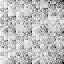

In [3]:
m = np.load("../output-subsample/fcgr/vibrio_cholerae__01/SAMEA1405597.fa.npy") 
FCGR(6).plot(m)

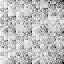

In [4]:
m = np.load("../output-subsample/fcgr/vibrio_cholerae__01/SAMEA1405597.fa.npy")
FCGR(6).plot(m)

In [80]:
import matplotlib.pyplot as plt
from PIL.Image import Image as PilImage
import textwrap, os

def display_images(
    images, k, 
    columns=5, width=25, height=8, max_images=30, 
    label_wrap_length=50, label_font_size=8,
    path_save=None):

    if not images:
        print("No images to display.")
        return 

    if len(images) > max_images:
        print(f"Showing {max_images} images of {len(images)}:")
        images=images[0:max_images]

    height = max(height, int(len(images)/columns) * height)
    fig = plt.figure(figsize=(width, height))
    fig.subplots_adjust(hspace=.3)

    for i, image in enumerate(images):

        plt.subplot(int(len(images) / columns + 1), columns, i + 1)
        m=np.load(image)
        plt.imshow(FCGR(k).array2img(m),"gray")

        # if hasattr(image, 'filename'):
        title=Path(image).parent.stem.split("__")[0] #+ "|" + Path(image).stem 
        if title.endswith("/"): title = title[0:-1]
        title=os.path.basename(title)
        title=textwrap.wrap(title, label_wrap_length)
        title="\n".join(title)
        plt.title(title, fontsize=label_font_size)
    
    plt.tight_layout()
    
    if path_save:
        Path(path_save).parent.mkdir(exist_ok=True, parents=True)
        fig.savefig(path_save, dpi=300)

In [89]:
from pathlib  import Path
KMER=6

imgs = [str(img) for img in list(Path(f"/data/bacteria/autoencoder-experiments/{KMER}mers/fcgr/").rglob("*npy"))]


In [90]:
from collections import defaultdict

path_by_species = defaultdict(list)
for img in imgs:
    name_species=Path(img).parent.stem.split("__")[0]
    path_by_species[name_species].append(img)
len(path_by_species)

143

In [91]:
img_display = [paths[0] for name, paths in path_by_species.items()]
len(img_display)

143

Showing 30 images of 143:


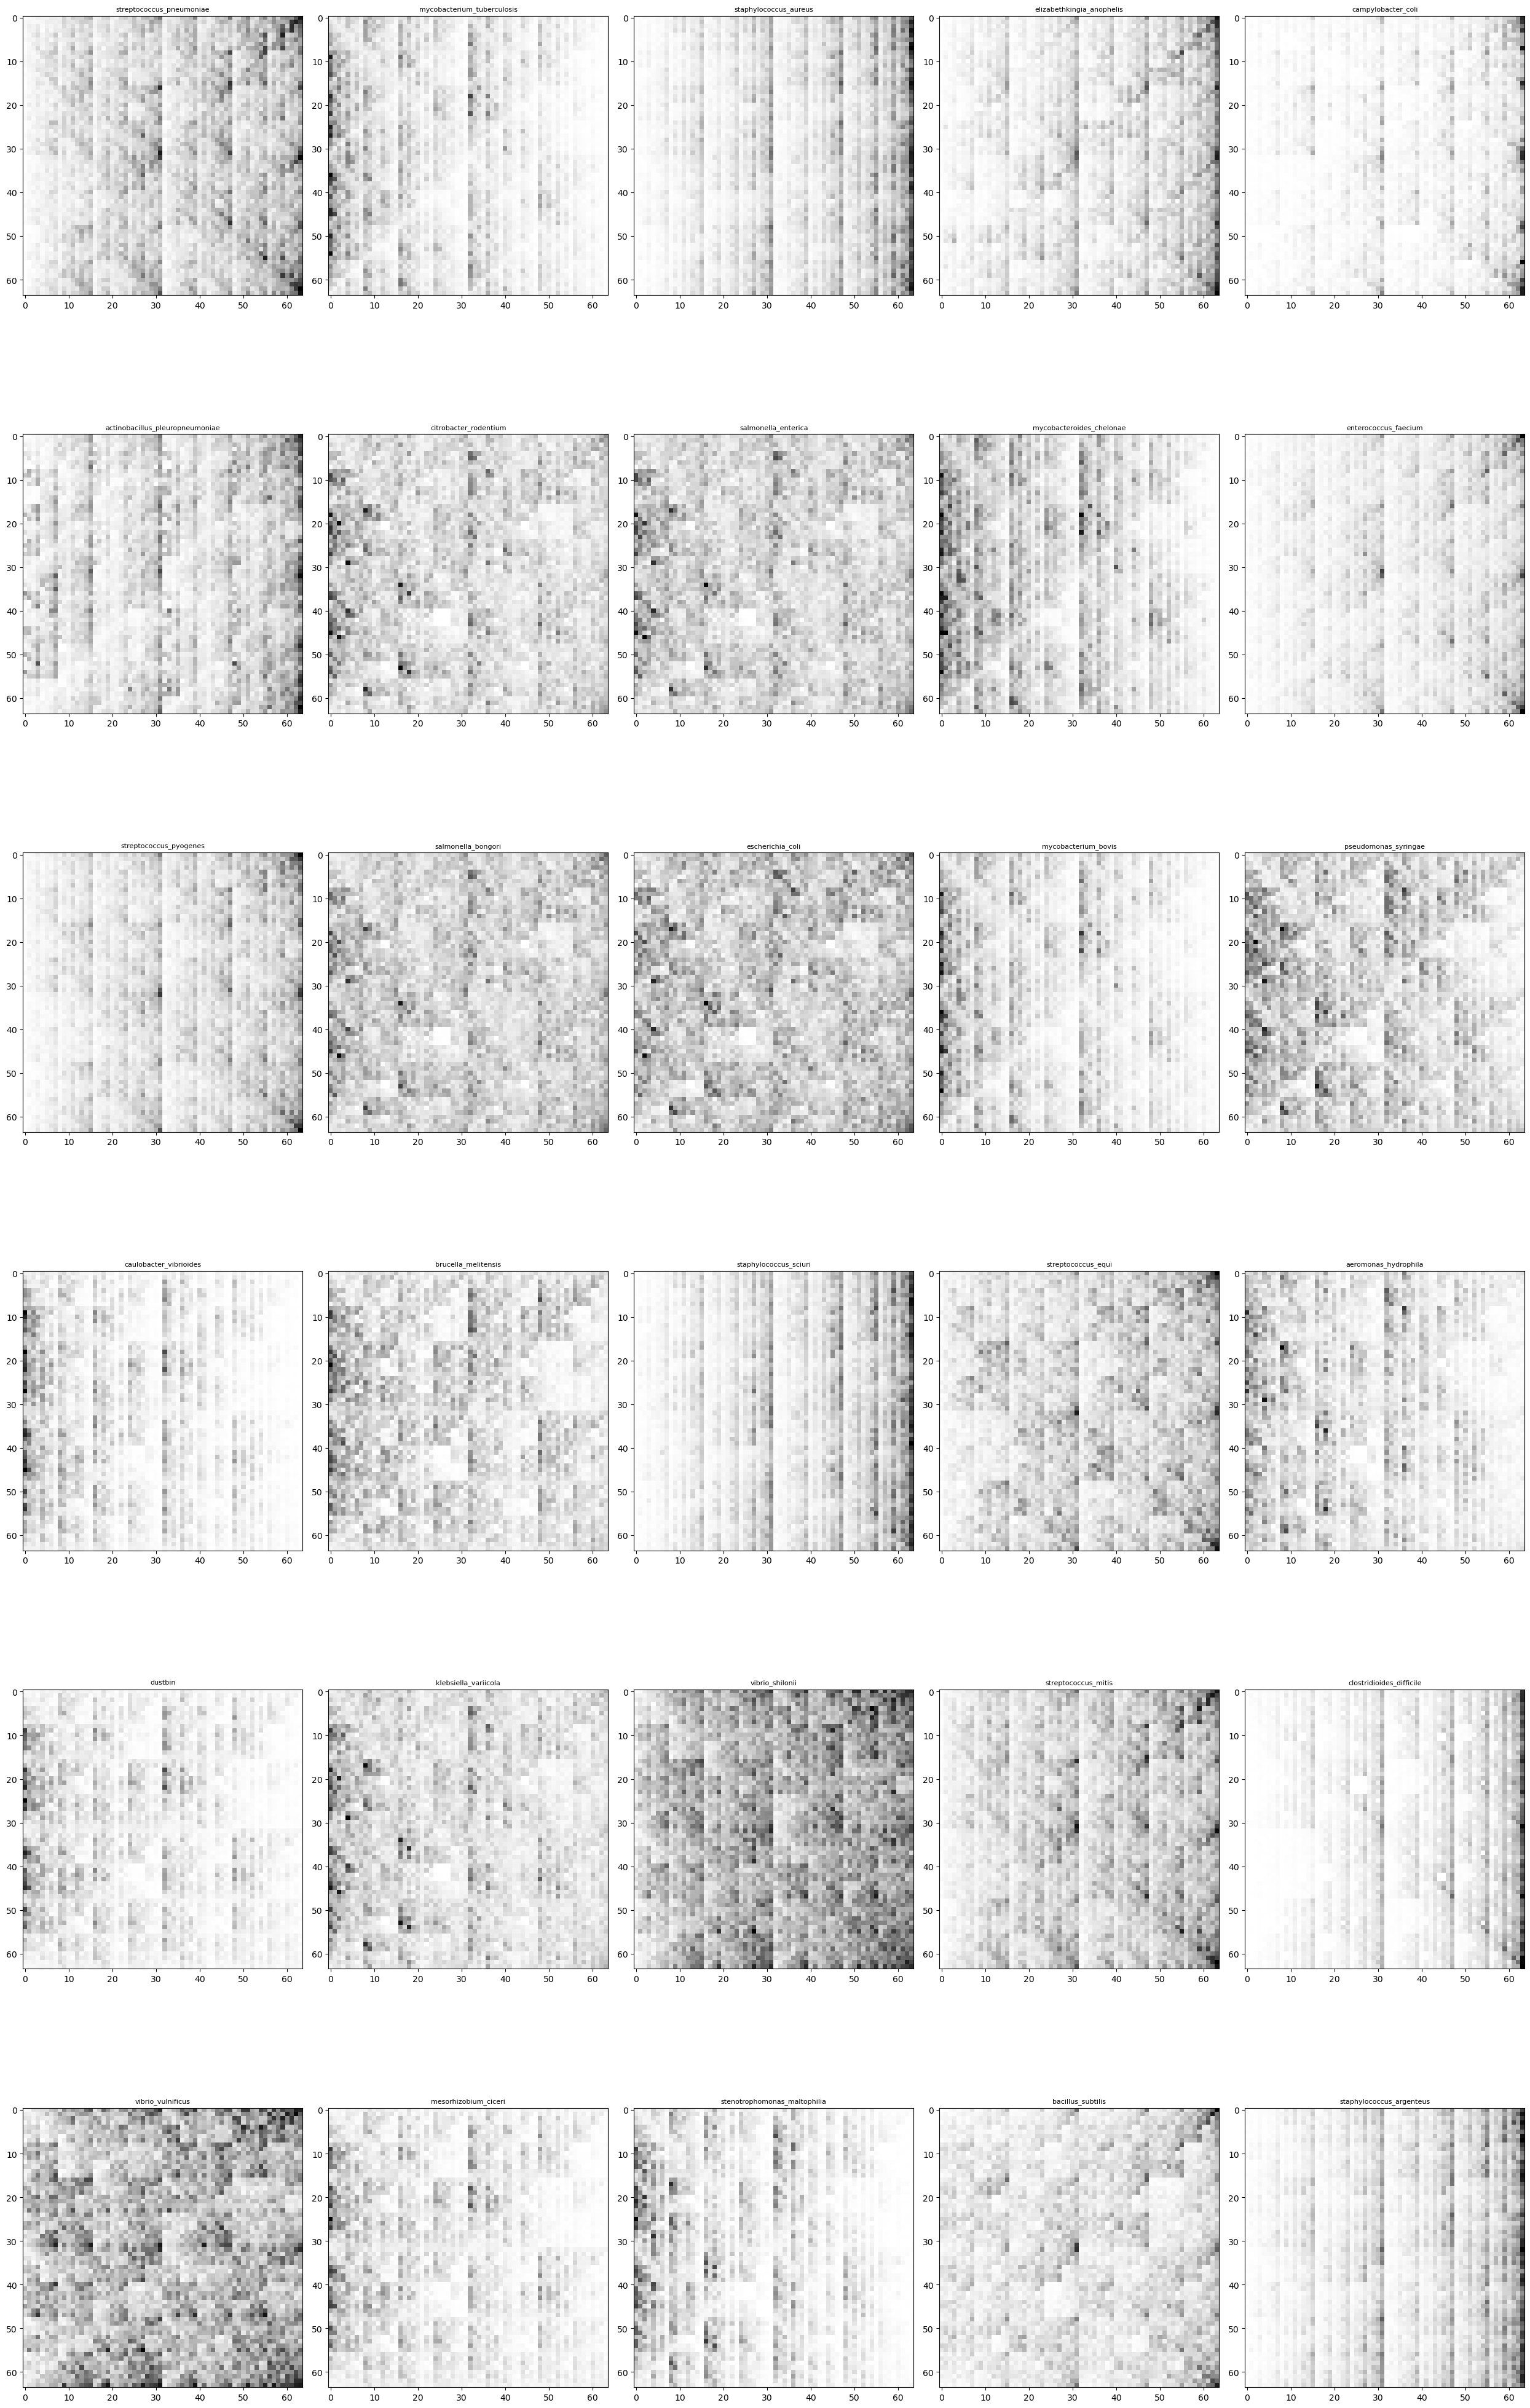

In [92]:
display_images(img_display, k=KMER, max_images=30, path_save=f"../plots/{KMER}mers/bacteria_1-30.png")

Showing 30 images of 113:


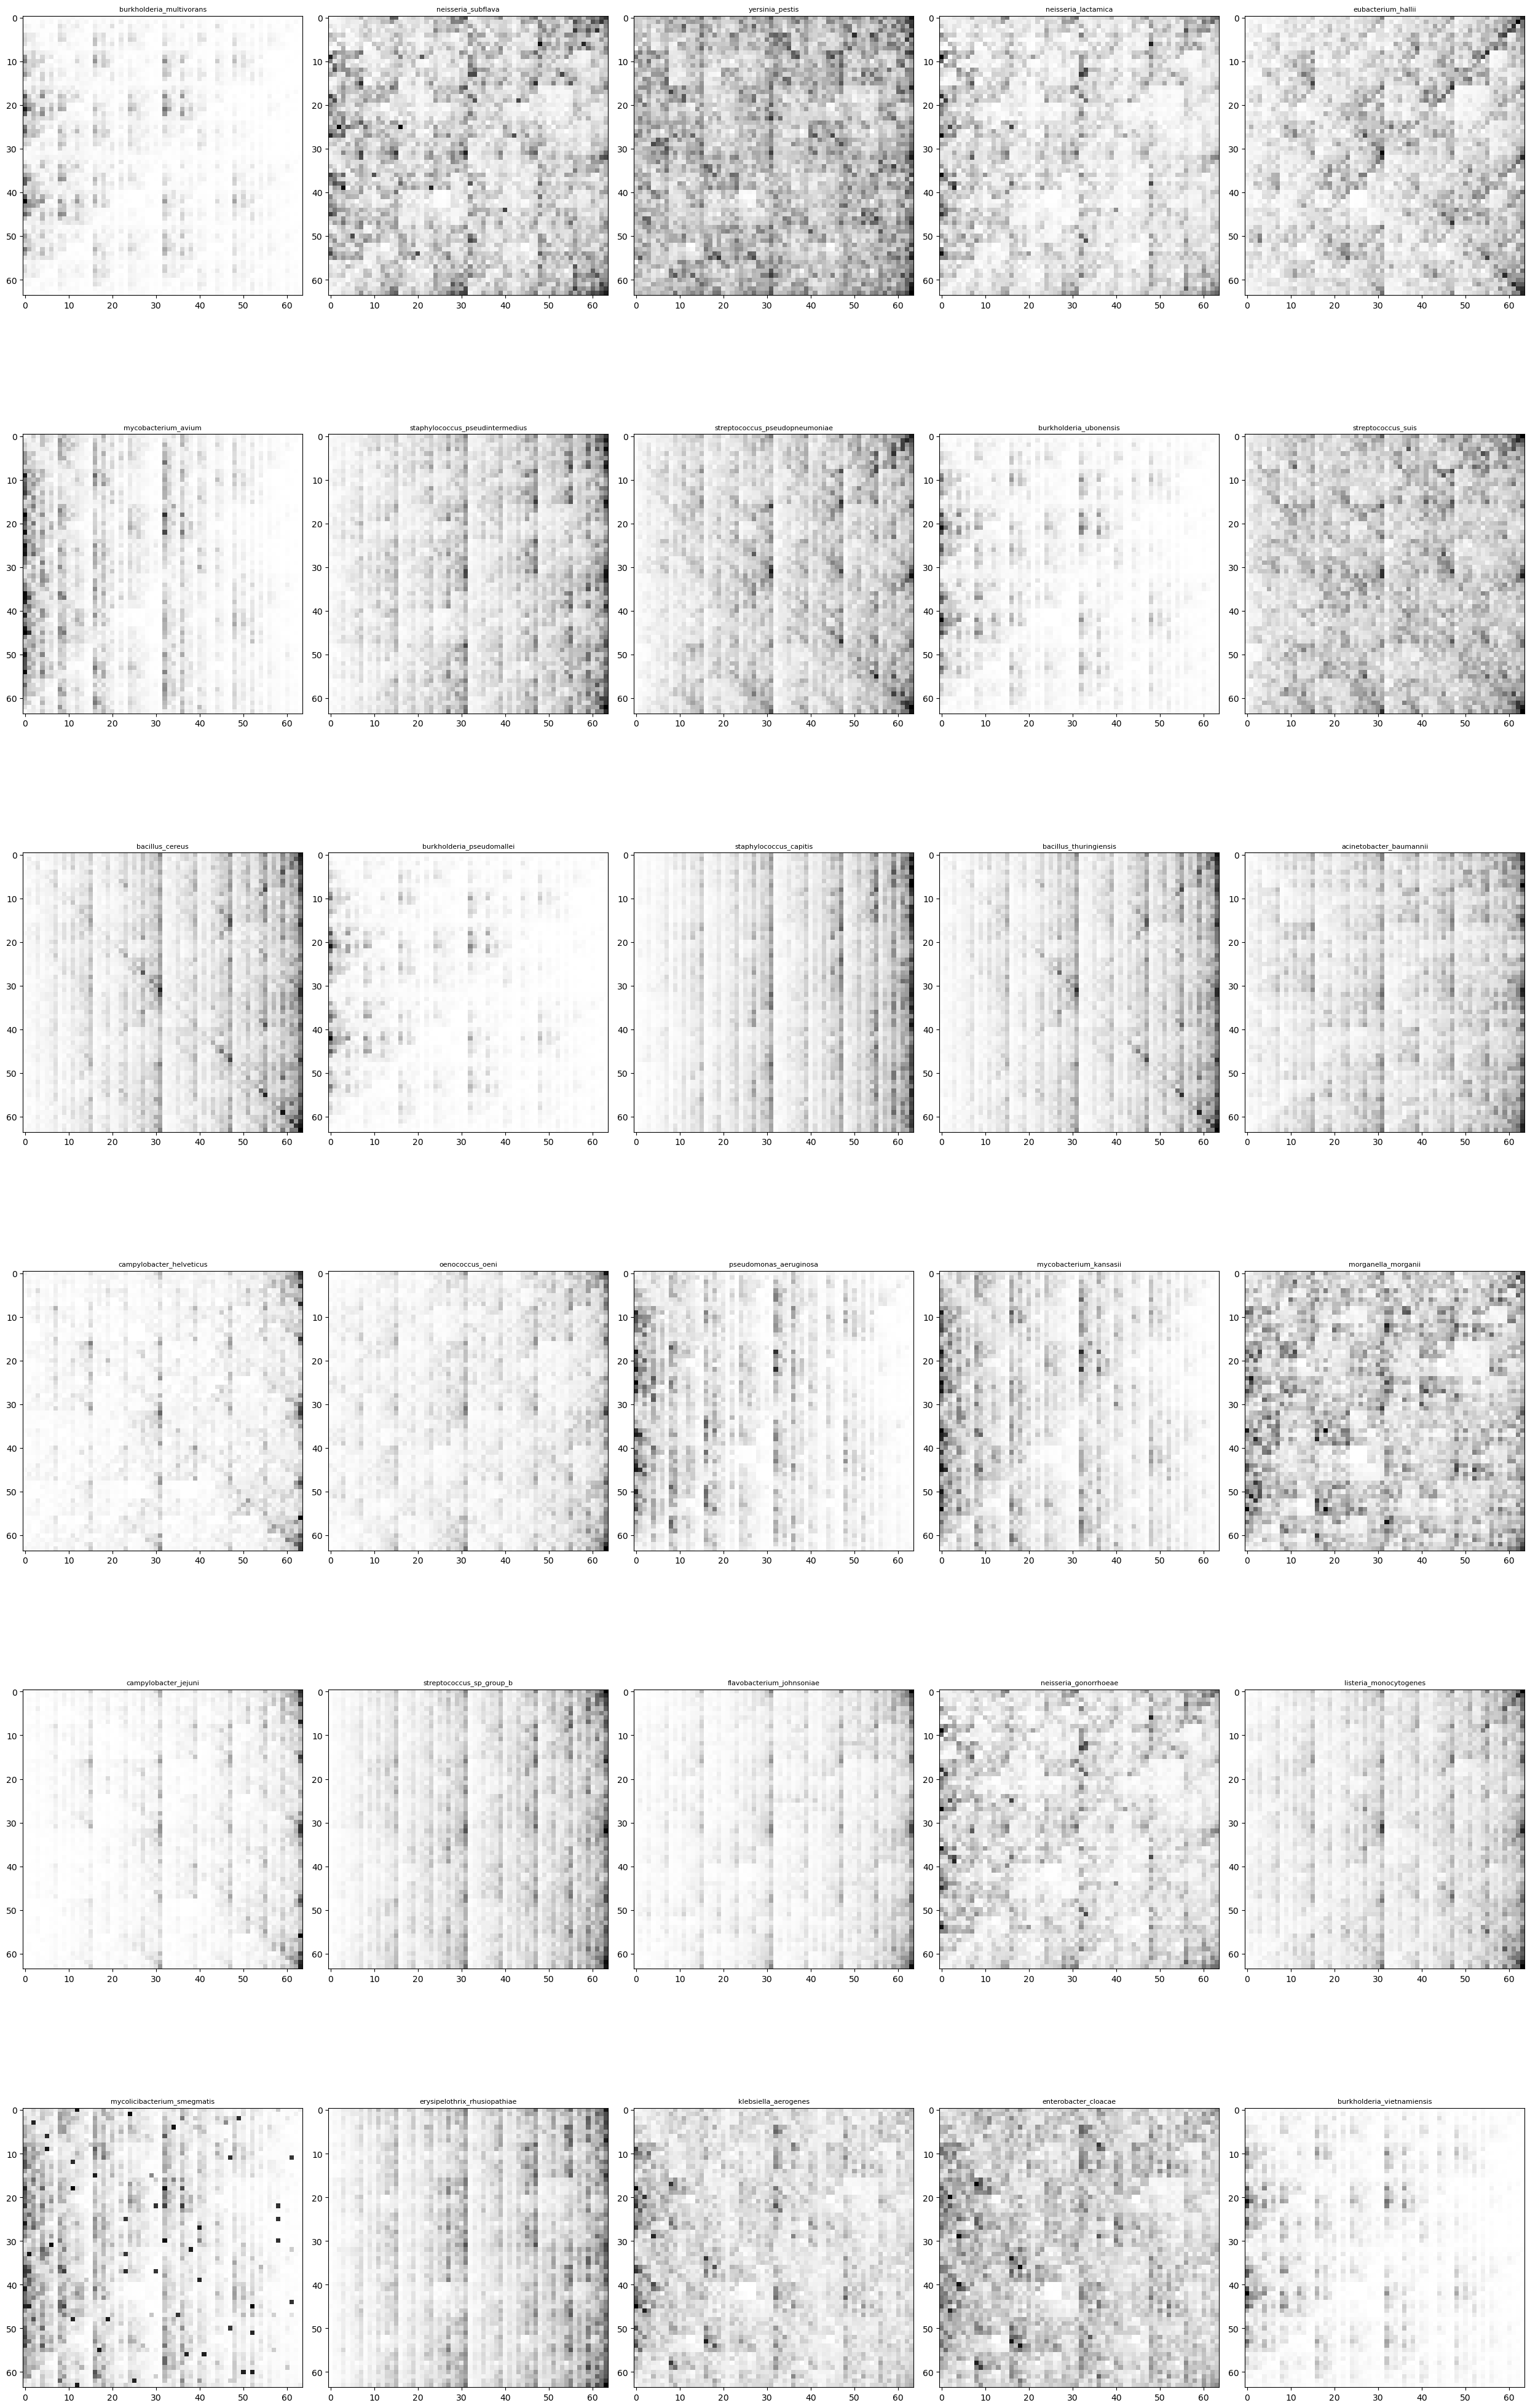

In [93]:
display_images(img_display[30:], k=KMER, max_images=30, path_save=f"../plots/{KMER}mers/bacteria_31-60.png")

Showing 30 images of 83:


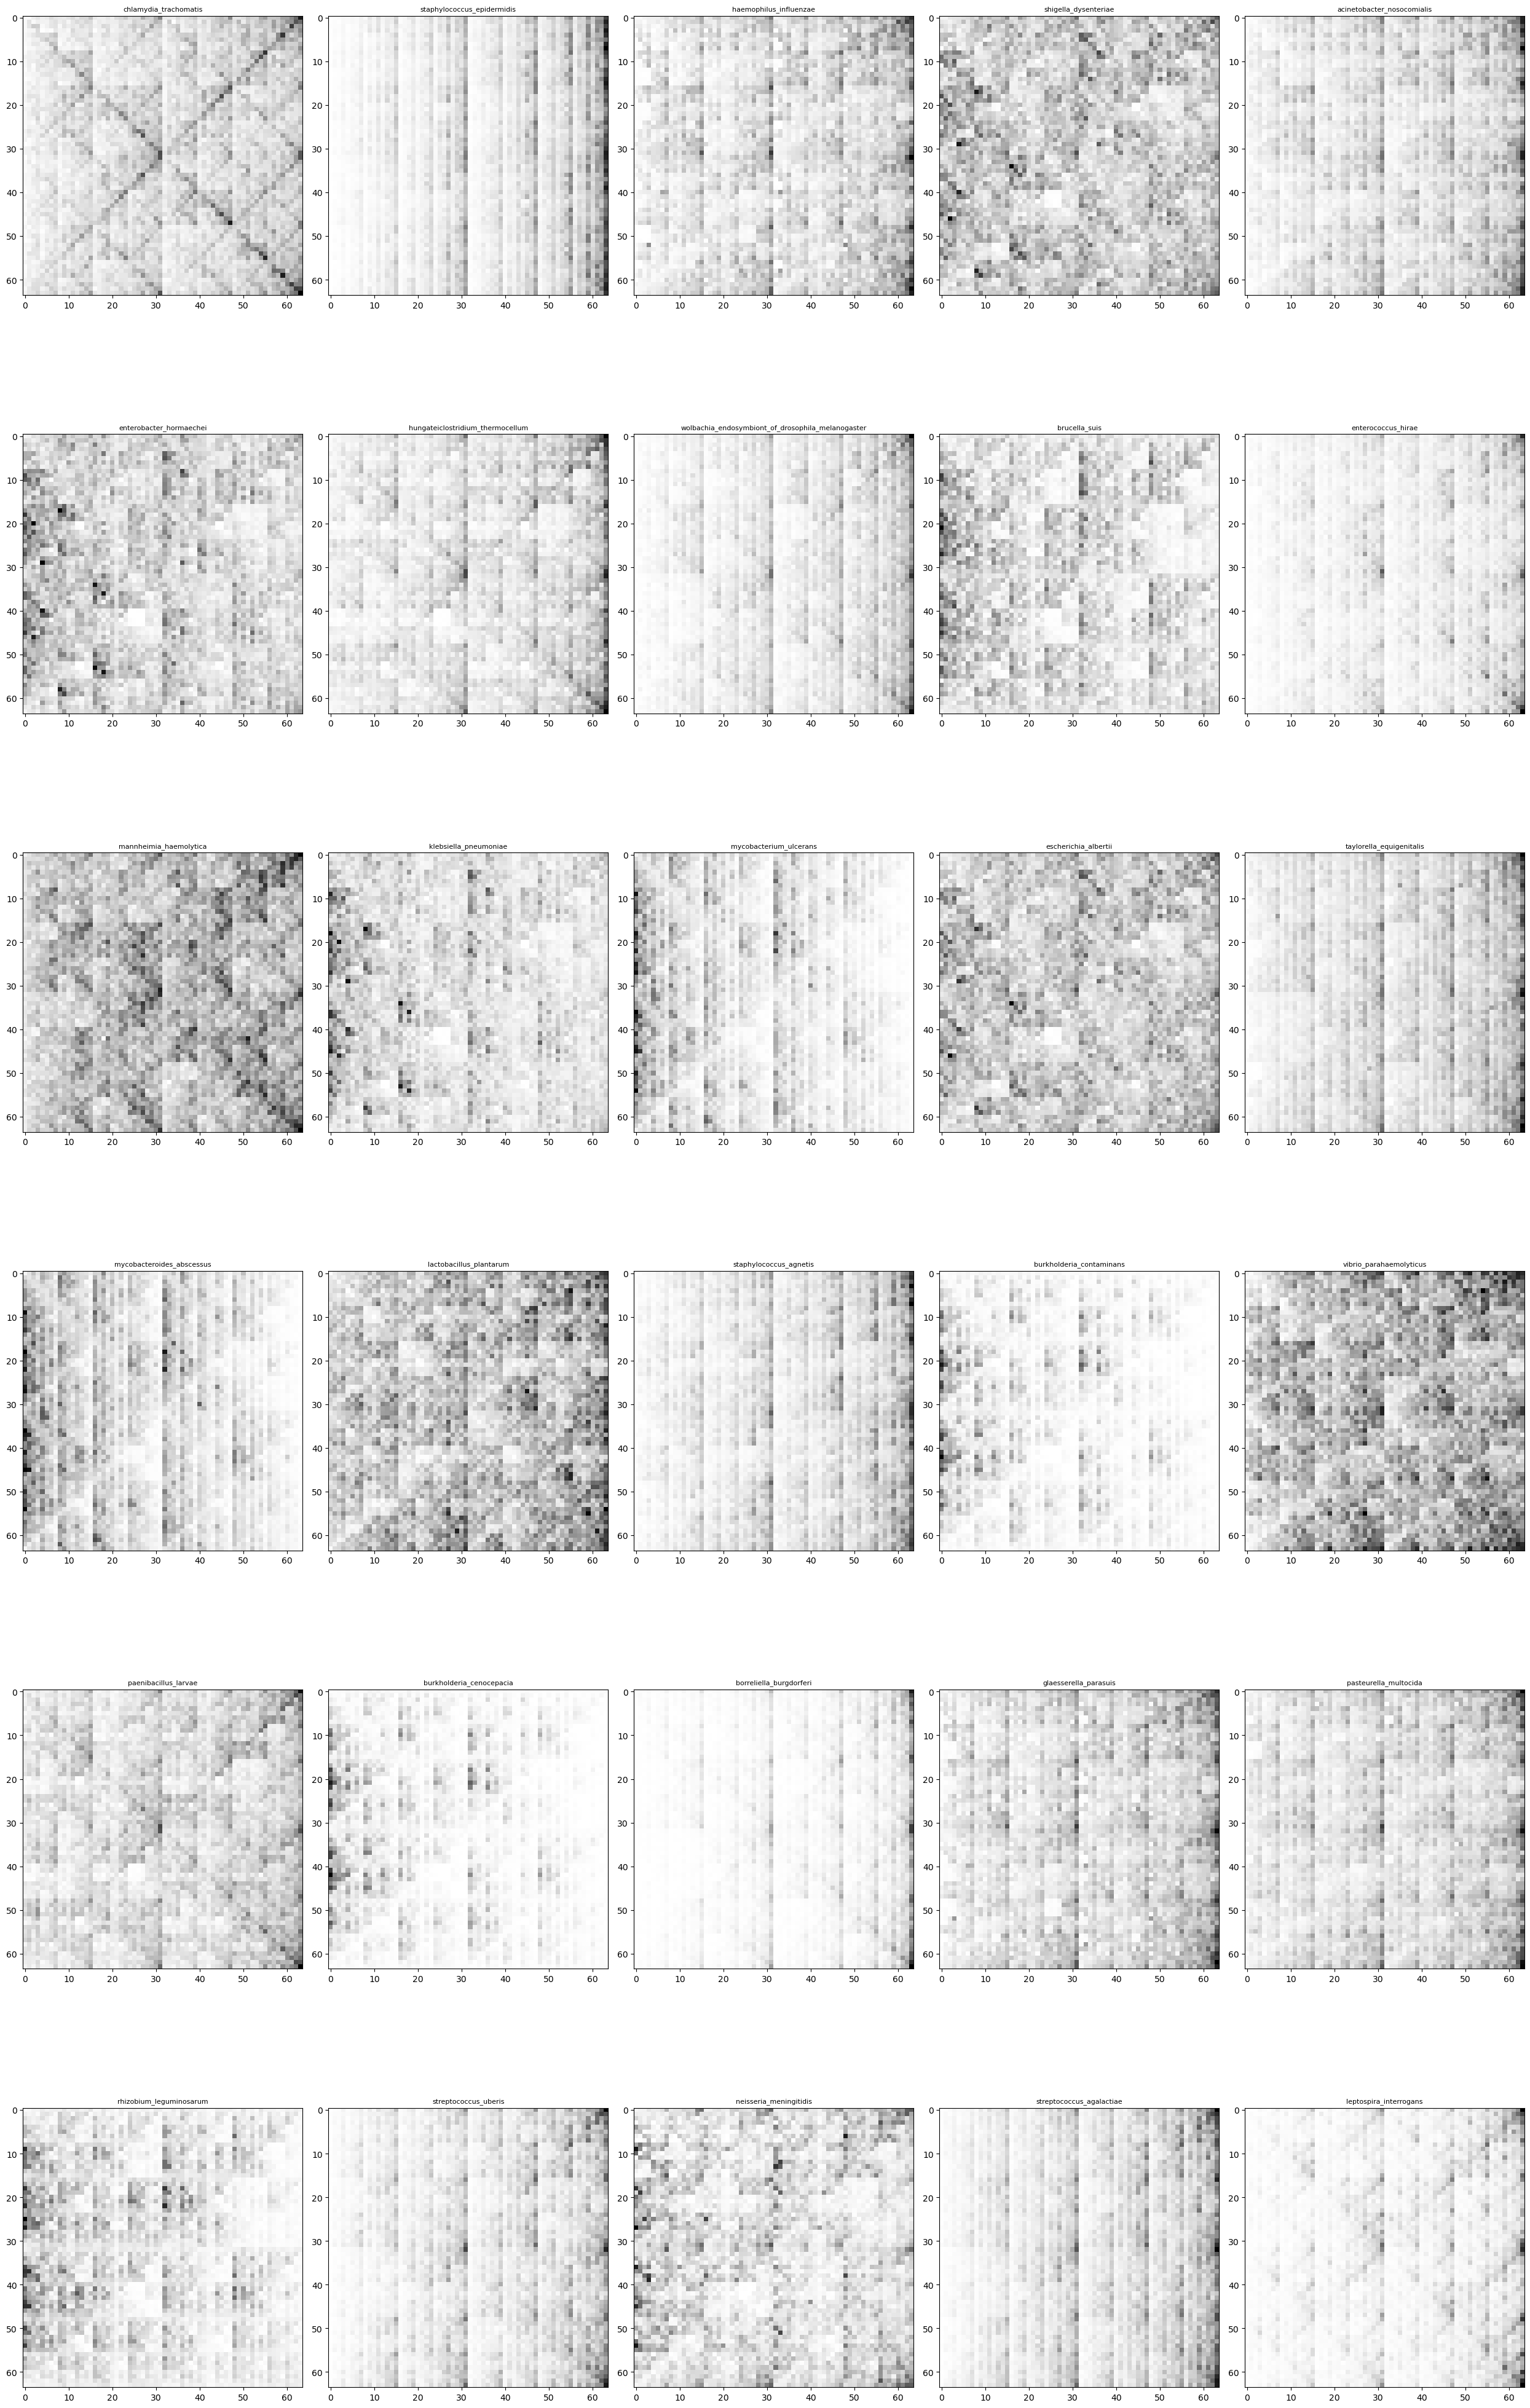

In [94]:
display_images(img_display[60:], k=KMER, max_images=30, path_save=f"../plots/{KMER}mers/bacteria_61-90.png")

Showing 30 images of 53:


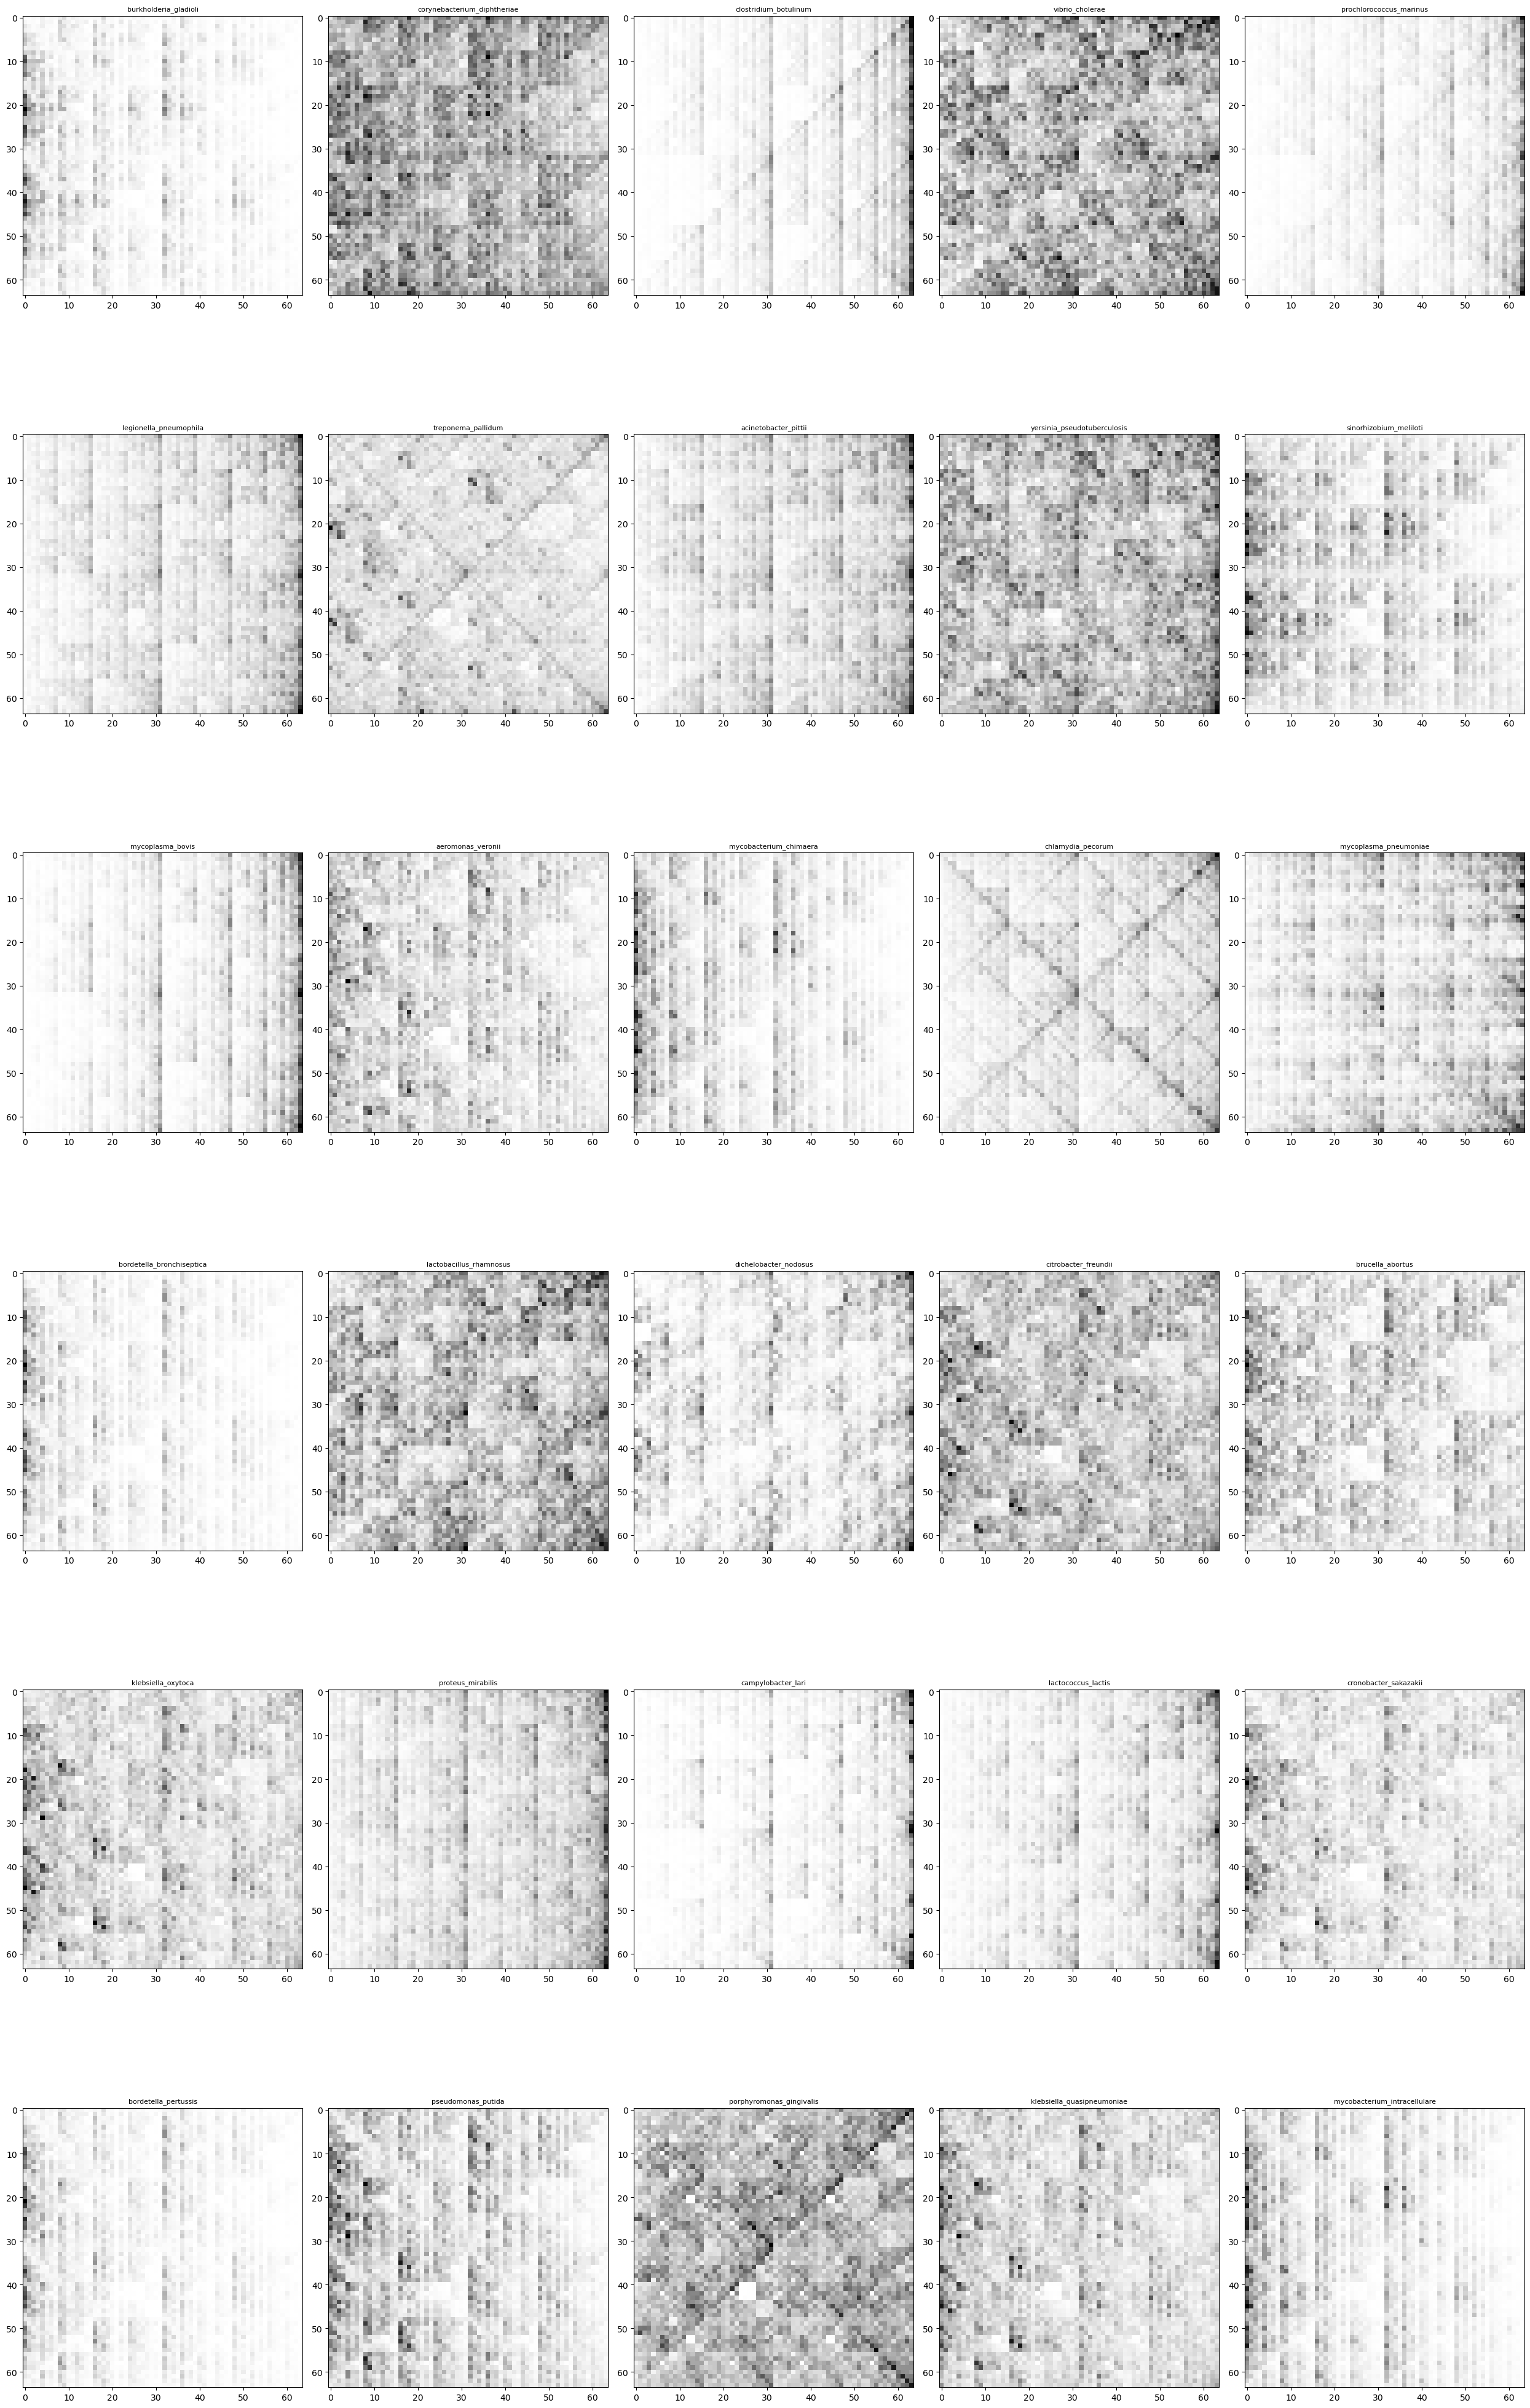

In [95]:
display_images(img_display[90:], k=KMER, max_images=30, path_save=f"../plots/{KMER}mers/bacteria_91-120.png")

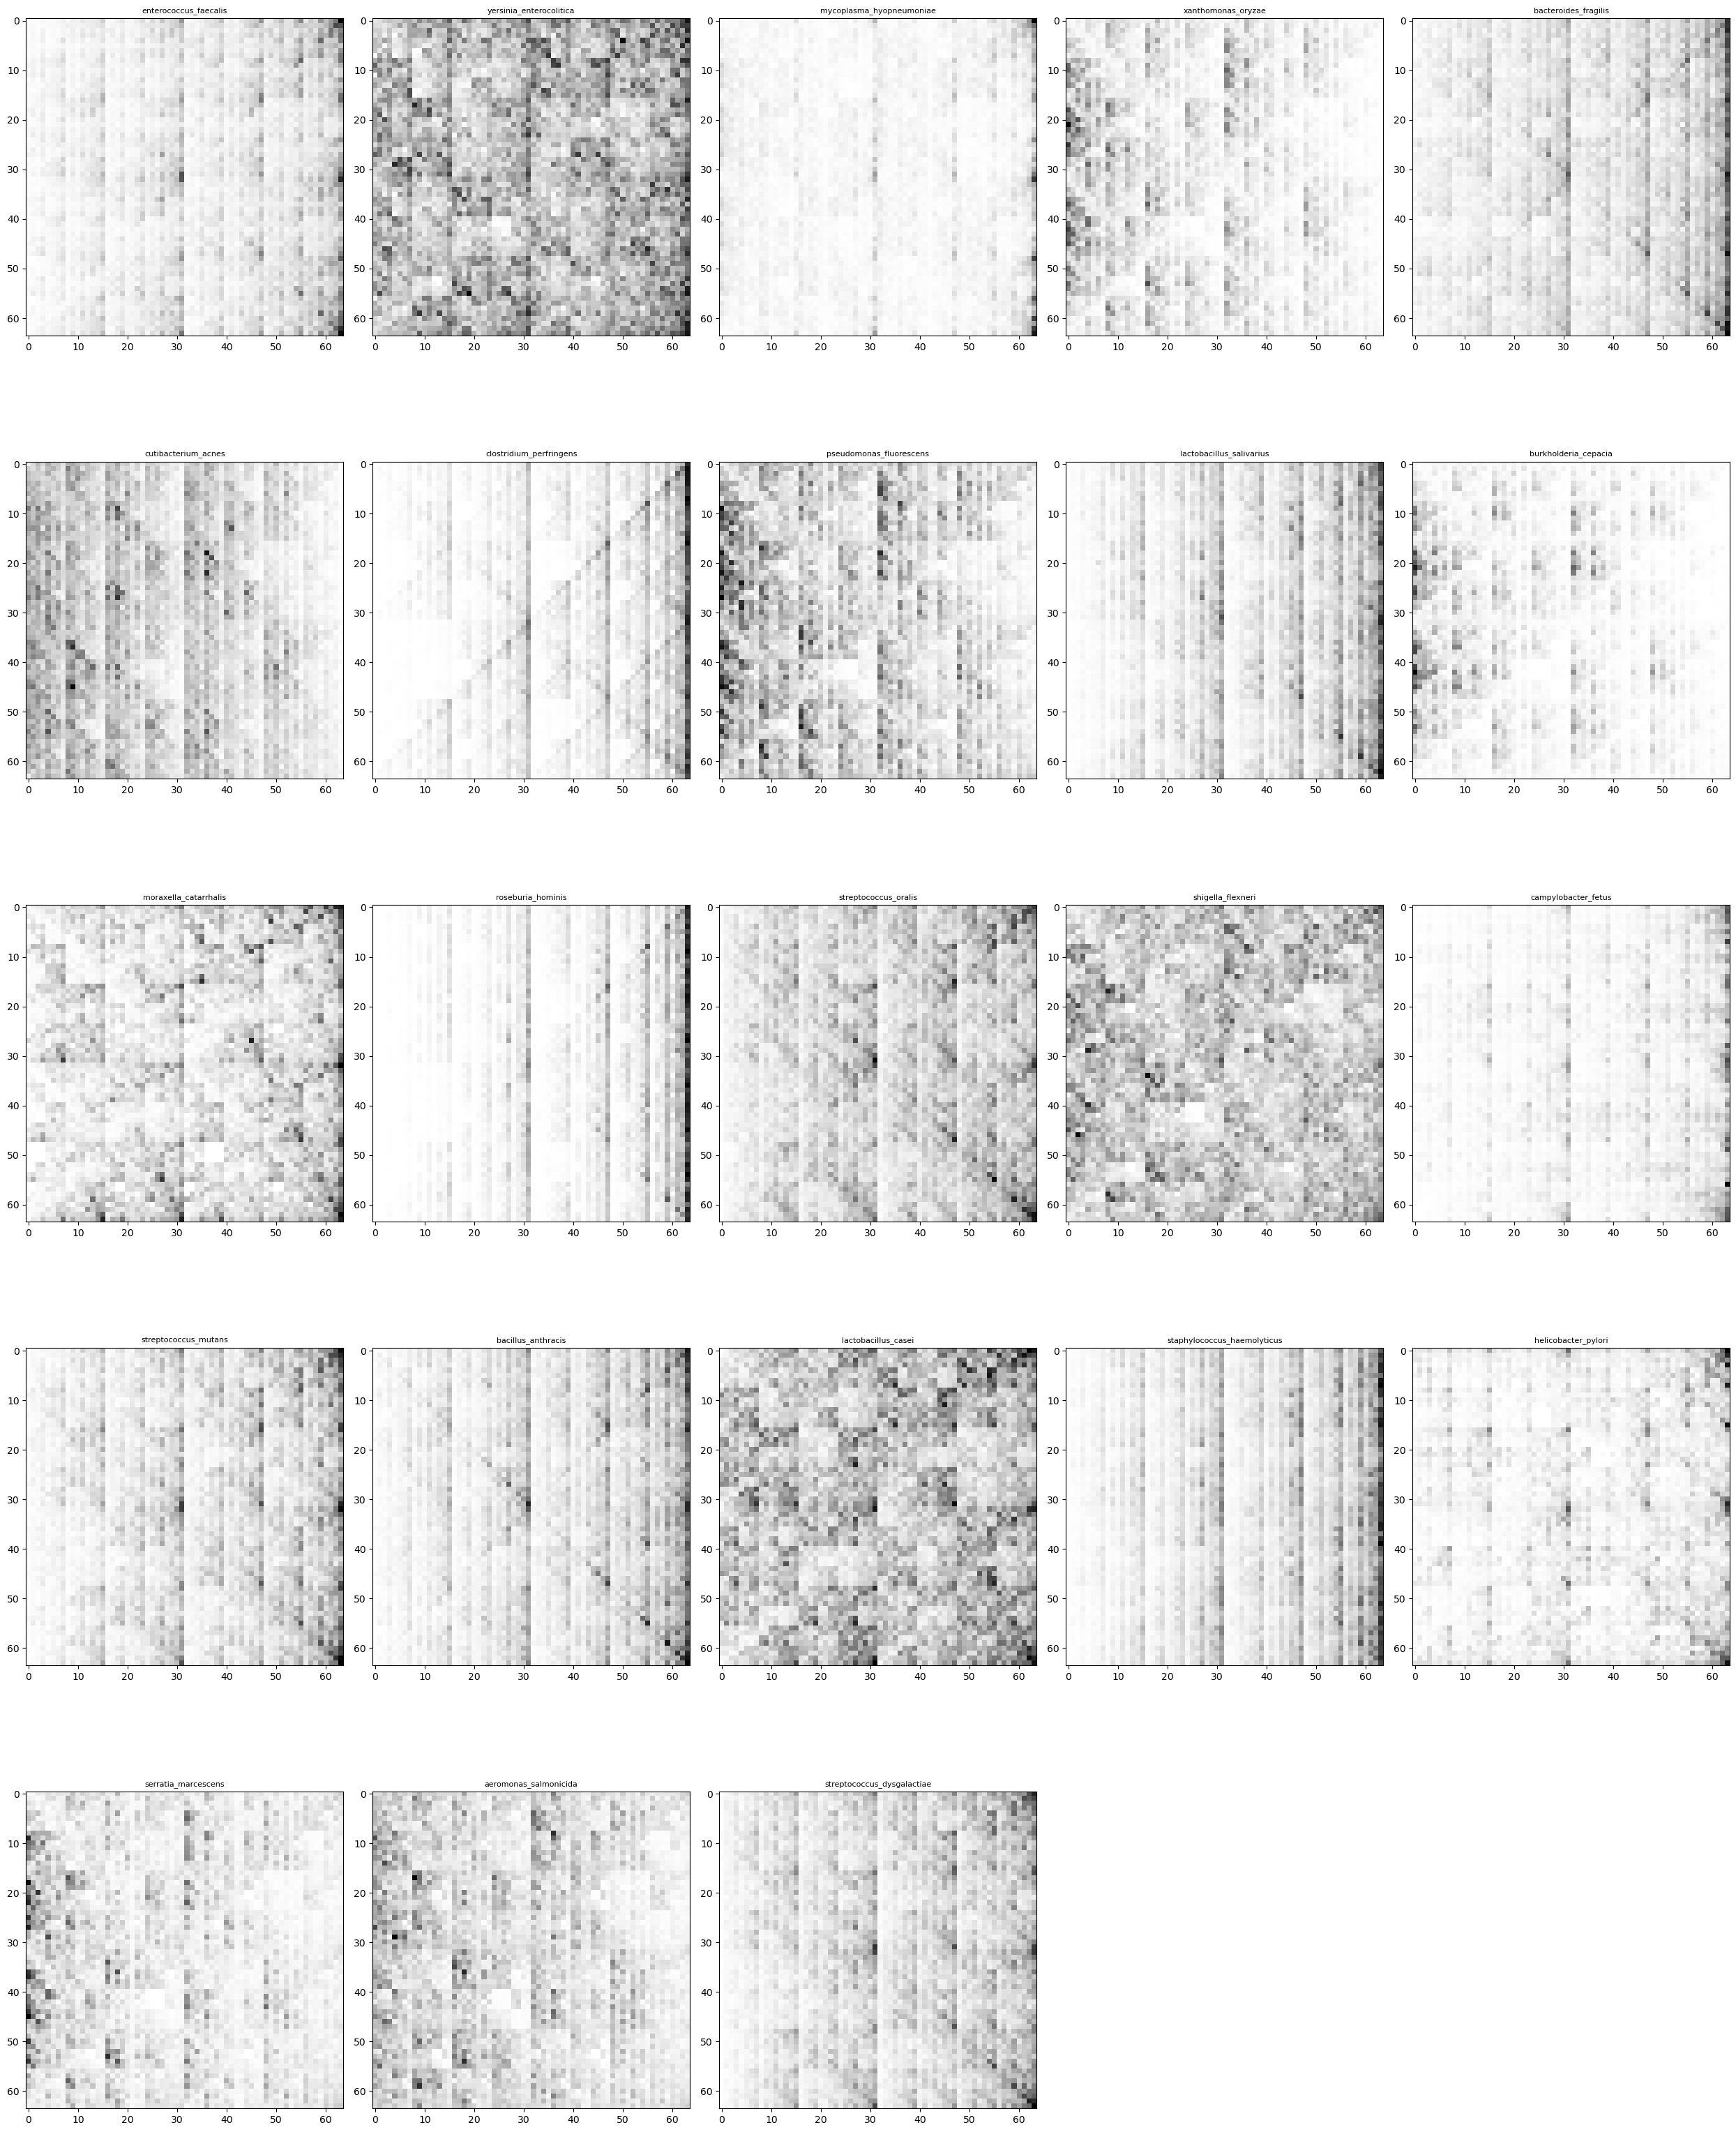

In [96]:
display_images(img_display[120:], k=KMER, max_images=30, path_save=f"../plots/{KMER}mers/bacteria_121-end.png")

In [9]:
from complexcgr.cgr import Coord 

fcgr = FCGR(8)
fcgr.nucleotide_coords

gc_content_coords = {
    'C': Coord(x=1, y=1),
    'A': Coord(x=-1, y=1),
    'G': Coord(x=-1, y=-1),
    'T': Coord(x=1, y=-1)
    }

fcgr.nucleotide_coords = gc_content_coords

In [11]:
fcgr.nucleotide_coords

{'C': Coord(x=1, y=1),
 'A': Coord(x=-1, y=1),
 'G': Coord(x=-1, y=-1),
 'T': Coord(x=1, y=-1)}

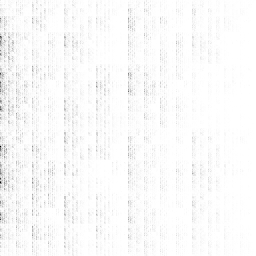

In [10]:
p = '/data/bacteria/autoencoder-experiments/8mers/fcgr/caulobacter_vibrioides__01/SAMN07428390.fa.npy'
m = np.load(p)
fcgr.plot(m)

8